In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df=pd.read_csv(r"C:\Users\vamsh\OneDrive\NARESHIT\DATA_FOLDER\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**selct the numerical columns**

In [6]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Prevailing wage**

- len
- max
- min
- mean
- median
- std dev
- 75%
- 50%
- 25%

In [7]:
len(visa_df['prevailing_wage'])

25480

In [8]:
max(visa_df['prevailing_wage'])# normal key word

319210.27

In [9]:
visa_df['prevailing_wage'].max() #using pandas

319210.27

In [10]:
np.max(visa_df['prevailing_wage']) #using numpy

319210.27

In [11]:
min(visa_df['prevailing_wage'])

2.1367

In [12]:
np.min(visa_df['prevailing_wage'])

2.1367

In [13]:
visa_df['prevailing_wage'].min()

2.1367

In [14]:
visa_df['prevailing_wage'].mean()


74455.81459209183

In [15]:
np.mean(visa_df['prevailing_wage'])


74455.81459209183

In [16]:
visa_df['prevailing_wage'].median()

70308.20999999999

In [17]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

In [18]:
np.std(visa_df['prevailing_wage'])

52814.90589711402

In [19]:
visa_df['prevailing_wage'].std()

52815.94232687357

In [20]:
## All together

wage_count=round(len(visa_df['prevailing_wage']),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
values=(wage_count,wage_max,wage_min,wage_mean,wage_median,wage_std)


In [21]:
list_values=[]
for i in values:
    list_values.append(i)
    
list_values

[25480, 319210.27, 2.14, 74455.81, 70308.21, 52815.94]

In [22]:
idx=['count','max','min','mean','median','std']
pd.DataFrame(list_values,
             index=idx,
             columns=['prevailing_wage'])

,prevailing_wage
count,25480.00
max,319210.27
min,2.14
mean,74455.81
median,70308.21
std,52815.94


**Percentile and Quantile**

- percentile:
      - np.percentile()
      - it will take 2 arguments
              - data : a
              - percentile means 'q' and the value of 'q' varies from 0 to 100
              - if you want 50p data then q=50

- Quantile:
      - np.quantile()
      - it will take 2 arguments
              - data: a
              - percentile means 'q' and the value varies from 0 to 1
              - if you want 50p data then q=0.5
  

**25p-50p-75p**

In [23]:
wage_25p=round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(visa_df['prevailing_wage'],75),2)

print(f'The 25% data is {wage_25p}')
print(f'The 50% data is {wage_50p}')
print(f'The 75% data is {wage_75p}')

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


In [24]:
wage_25q=round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50q=round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75q=round(np.quantile(visa_df['prevailing_wage'],0.75),2)

print(f'The 25% data is {wage_25q}')
print(f'The 50% data is {wage_50q}')
print(f'The 75% data is {wage_75q}')

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


**understanding the percentiles**

- defination of 25 percentile
  
      - there are 25% of employees with salary less than 34015
      - total employess= 25480
      - 25% of employees= 25480*25/100=6370
      - 6370 employees salary less than 34015

In [25]:
con=visa_df['prevailing_wage']<34015
len(visa_df[con])

6370

- defination of 50 percentile
      - there are 50% employees with salary less than 70308
      - total employees = 25480
      - 50% of employees=25480*50/100=12740
      - 12740 employees salary less than 70308


In [26]:
cond=visa_df['prevailing_wage']<70308
len(visa_df[cond])

12740

- defination of 75 percentile
    - there are 75% employees with salary less than 107735
    - total number of employees= 25480
    - 75% of employees=25480*75/100=19110
    - 19110 employees salary less than 107735

In [27]:
condt=visa_df['prevailing_wage']<107735
len(visa_df[condt])

19110

**Emperical rule (68-95-99.7)**

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 810px; height: 147px; margin: 0px; width: 294px;" alt="Empirical Rule (68-95-99.7) Explained | Built In" jsname="kn3ccd" aria-hidden="false">

- first calculate mean value
- second calculate std value
- con1: mean-1*std
- con2: mean+1*std
- of you apply above condition on wage data, the output count
  should be equal to 68 percentile data
- 68% of total employees=68*25480/100=17326

In [28]:
v1=wage_mean-1*wage_std
v2=wage_mean+1*wage_std
v1,v2

(21639.869999999995, 127271.75)

In [29]:
con1=visa_df['prevailing_wage']>v1
con2=visa_df['prevailing_wage']<v2
count1=len(visa_df[con1&con2])
count1

17171

In [30]:
val1=wage_mean-2*wage_std
val2=wage_mean+2*wage_std
val1,val2

(-31176.070000000007, 180087.69)

In [31]:
con1=visa_df['prevailing_wage']>val1
con2=visa_df['prevailing_wage']<val2
count2=len(visa_df[con1&con2])
count2

24582

In [32]:
value1=wage_mean-3*wage_std
value2=wage_mean+3*wage_std
value1,value2

(-83992.01000000001, 232903.63)

In [33]:
con1=visa_df['prevailing_wage']>value1
con2=visa_df['prevailing_wage']<value2
count3=len(visa_df[con1&con2])
count3

25186

In [34]:
## All together

wage_count=round(len(visa_df['prevailing_wage']),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
values=(wage_count,wage_max,wage_min,wage_mean,wage_median,wage_std)

############################################################################
wage_25q=round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50q=round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75q=round(np.quantile(visa_df['prevailing_wage'],0.75),2)

#############################################################################
list_values=[wage_count,wage_min,wage_max,
             wage_mean,wage_median,wage_std,
             wage_25p,wage_50p,wage_75p]
idx=['count','min','max',
     'mean','median','std',
      '25%','50%','75%']
pd.DataFrame(list_values,
             index=idx,
             columns=['prevailing_wage'])

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


**No of Employees**

- len
- max
- min
- mean
- median
- std dev
- 75%
- 50%
- 25%

In [35]:
len(visa_df['no_of_employees'])

25480

In [36]:
visa_df['no_of_employees'].max()

602069

In [37]:
visa_df['no_of_employees'].min()

-26

In [38]:
visa_df['no_of_employees'].mean()

5667.043210361067

In [39]:
visa_df['no_of_employees'].median()

2109.0

In [40]:
visa_df['no_of_employees'].std()

22877.928847734398

In [41]:
emp_len=round(len(visa_df['no_of_employees']),2)
emp_max=round(visa_df['no_of_employees'].max(),2)
emp_min=round(visa_df['no_of_employees'].min(),2)
emp_mean=round(visa_df['no_of_employees'].mean(),2)
emp_median=round(visa_df['no_of_employees'].median(),2)
emp_std=round(visa_df['no_of_employees'].std(),2)
list_values=[emp_len,emp_max,emp_min,emp_mean,emp_median,emp_std]
list_values

[25480, 602069, -26, 5667.04, 2109.0, 22877.93]

In [42]:
idx=['count','max','min','mean','median','std']
pd.DataFrame(list_values,
             index=idx,
             columns=['No of employees'])

,No of employees
count,25480.00
max,602069.00
min,-26.00
mean,5667.04
median,2109.00
std,22877.93


In [43]:
emp_25q=round(np.quantile(visa_df['no_of_employees'],0.25),2)
emp_50q=round(np.quantile(visa_df['no_of_employees'],0.50),2)
emp_75q=round(np.quantile(visa_df['no_of_employees'],0.75),2)

print(f'The 25% data is {emp_25q}')
print(f'The 50% data is {emp_50q}')
print(f'The 75% data is {emp_75q}')

The 25% data is 1022.0
The 50% data is 2109.0
The 75% data is 3504.0


In [44]:
list_values=[emp_len,emp_max,emp_min,
             emp_mean,emp_median,emp_std,
             emp_25q,emp_50q,emp_75q]

idx=['count','max','min',
     'mean','median','std',
     '25%','50%','75%']
pd.DataFrame(list_values,
             index=idx,
             columns=['No of employees'])

,No of employees
count,25480.00
max,602069.00
min,-26.00
mean,5667.04
median,2109.00
std,22877.93
25%,1022.00
50%,2109.00
75%,3504.00


In [45]:
emp_len=len(visa_df['no_of_employees'])
emp_max=visa_df['no_of_employees'].max()
emp_min=visa_df['no_of_employees'].min()
emp_mean=visa_df['no_of_employees'].mean()
emp_median=visa_df['no_of_employees'].median()
emp_std=visa_df['no_of_employees'].std()
list_values=[emp_len,emp_max,emp_min,emp_mean,emp_median,emp_std]

#########################################################################

emp_25q=round(np.quantile(visa_df['no_of_employees'],0.25),2)
emp_50q=round(np.quantile(visa_df['no_of_employees'],0.50),2)
emp_75q=round(np.quantile(visa_df['no_of_employees'],0.75),2)

#############################################################################

list_values=[emp_len,emp_max,emp_min,
             emp_mean,emp_median,emp_std,
             emp_25q,emp_50q,emp_75q]

idx=['count','max','min',
     'mean','median','std',
     '25%','50%','75%']
pd.DataFrame(list_values,
             index=idx,
             columns=['No of employees'])


,No of employees
count,25480.000000
max,602069.000000
min,-26.000000
mean,5667.043210
median,2109.000000
std,22877.928848
25%,1022.000000
50%,2109.000000
75%,3504.000000


In [46]:
l1=[]
cols=['no_of_employees','yr_of_estab','prevailing_wage']

for i in cols:
    lenn=round(len(visa_df[i]),2)
    maxx=round(visa_df[i].max(),2)
    minn=round(visa_df[i].min(),2)
    meann=round(visa_df[i].mean(),2)
    mediann=round(visa_df[i].median(),2)
    stdd=round(visa_df[i].std(),2)
    q_25=round(np.quantile(visa_df[i],0.25),2)
    q_50=round(np.quantile(visa_df[i],0.50),2)
    q_75=round(np.quantile(visa_df[i],0.75),2)
    l1.append([lenn,maxx,minn,meann,mediann,stdd,q_25,q_50,q_75])

idx=['count','max','min',
     'mean','median','std',
     '25%','50%','75%']

pd.DataFrame(l1,index=cols,columns=idx).T


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
max,602069.00,2016.00,319210.27
min,-26.00,1800.00,2.14
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
std,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


**Describe function**

- it is only for numerical data

In [47]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

- Histogram can get by matplotlib
- histogram can get by seaborn also
- plt.hist()

In [48]:
import matplotlib.pyplot as plt

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

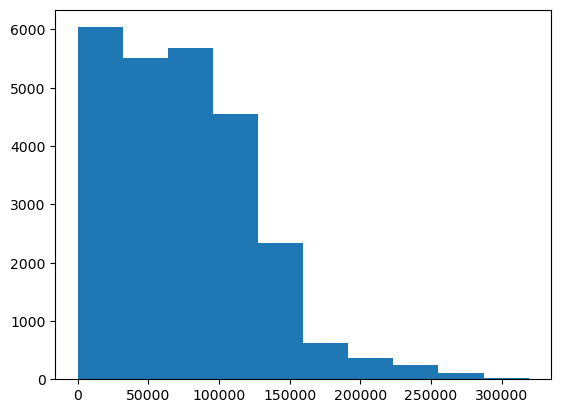

In [49]:
plt.hist(visa_df['prevailing_wage'])

- from interval range
    - 2.13670000e+00 to 3.19229500e+04
        - 6038 memebers have salary
    - 3.19229500e+04 to 6.38437634e+04
        - 5504 members have salary

- histogram will give 3 outputs
    - frequency
            - in each interval range how many observations are there
    - interval
            - interval range
    - number of intervals

**check point-1**

In [50]:
2.13670000e+00 , 3.19229500e+04


(2.1367, 31922.95)

In [51]:
con1=visa_df['prevailing_wage']>=2.1367
con2=visa_df['prevailing_wage']<31922.95
count1=len(visa_df[con1&con2])
count1

6038

<BarContainer object of 100 artists>


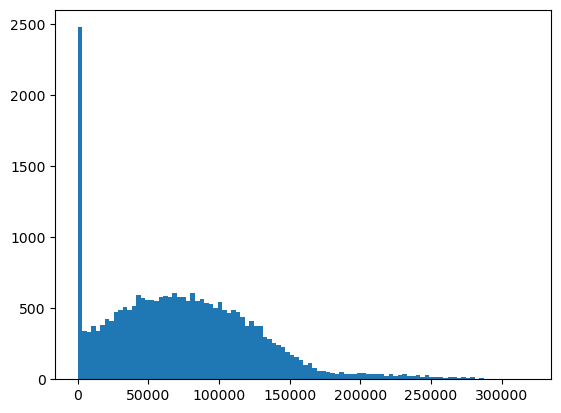

In [54]:
f,i,n=plt.hist(visa_df['prevailing_wage'],
         bins=100)
print(n)

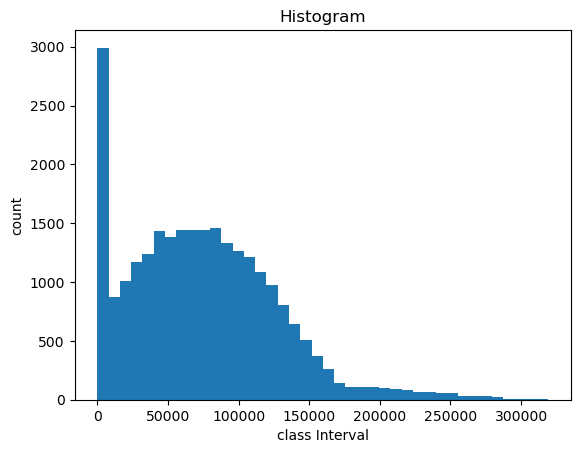

In [56]:
import matplotlib.pyplot as plt
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.title('Histogram')
plt.xlabel('class Interval')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'count')

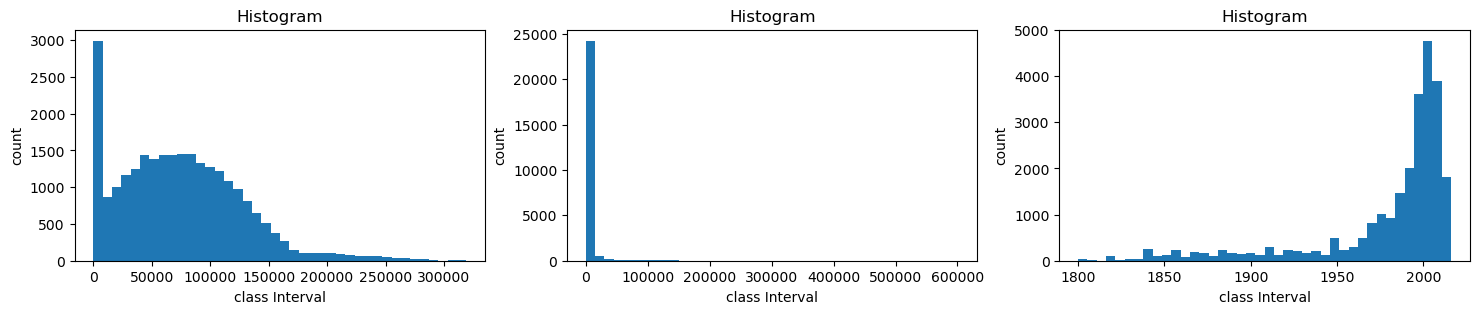

In [63]:
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.title('Histogram')
plt.xlabel('class Interval')
plt.ylabel('count')

plt.subplot(1,3,2)
plt.hist(visa_df['no_of_employees'],bins=40)
plt.title('Histogram')
plt.xlabel('class Interval')
plt.ylabel('count')

plt.subplot(1,3,3)
plt.hist(visa_df['yr_of_estab'],bins=40)
plt.title('Histogram')
plt.xlabel('class Interval')
plt.ylabel('count')


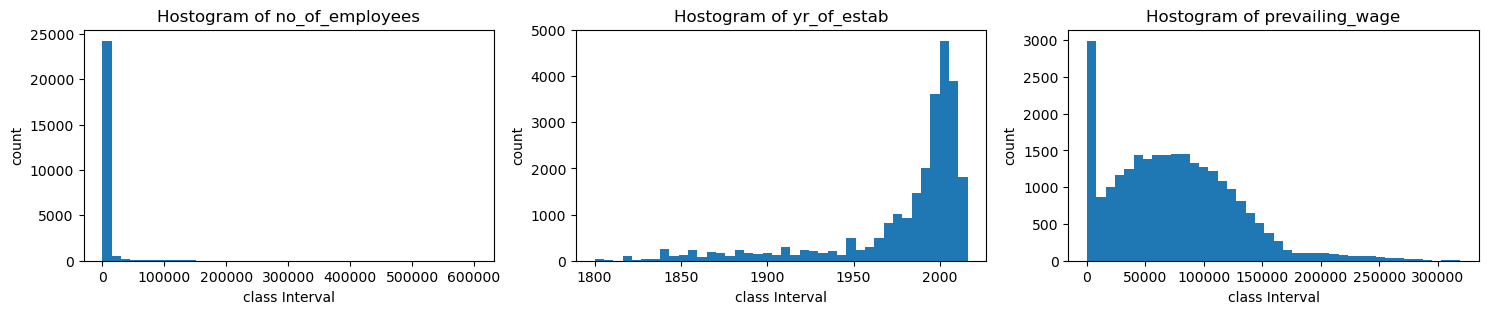

In [64]:
plt.figure(figsize=(18,3))
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    plt.hist(visa_df[cols[i]],bins=40)
    plt.title(f'Hostogram of {cols[i]}')
    plt.xlabel('class Interval')
    plt.ylabel('count')

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Count'>

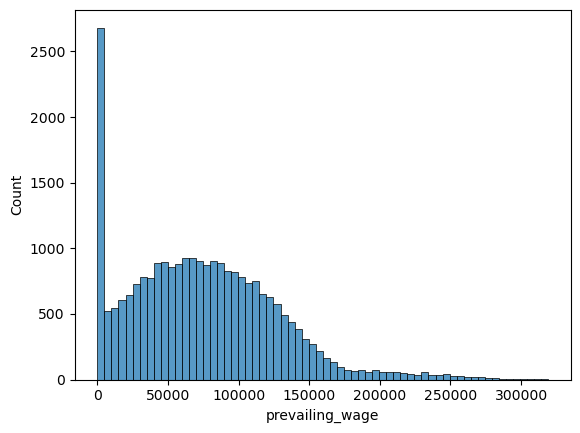

In [65]:
sns.histplot(visa_df['prevailing_wage'])

C:\Users\vamsh\AppData\Local\Temp\ipykernel_22484\2041553515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visa_df['prevailing_wage'])
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Density'>

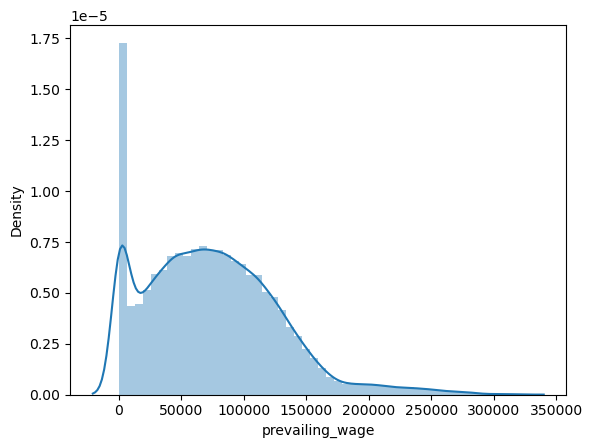

In [67]:
sns.distplot(visa_df['prevailing_wage'])

<Axes: xlabel='prevailing_wage', ylabel='Density'>

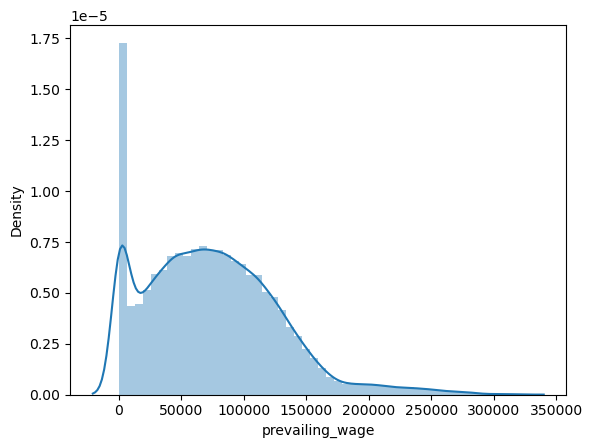

In [68]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(visa_df['prevailing_wage'])

<Axes: xlabel='prevailing_wage', ylabel='Density'>

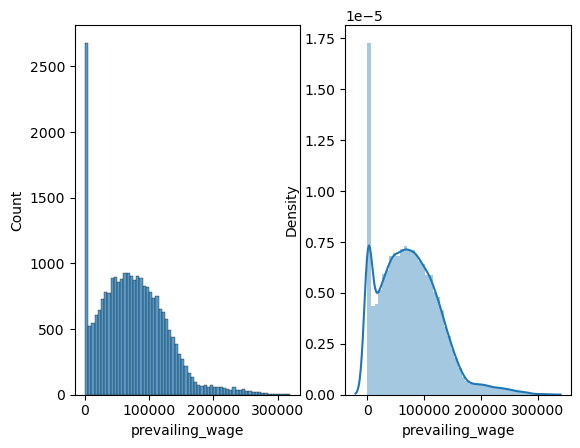

In [77]:
import seaborn as sns
plt.subplot(1,2,1)
sns.histplot(visa_df['prevailing_wage'])

import seaborn as sns
plt.subplot(1,2,2)
sns.distplot(visa_df['prevailing_wage'])

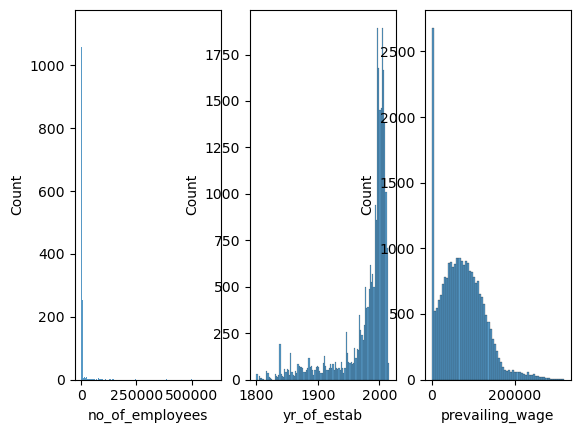

In [85]:
for i in range(len(cols)):
   # plt.figure(figsize=(5,3))
    plt.subplot(1,len(cols),i+1)
    sns.histplot(visa_df[cols[i]])

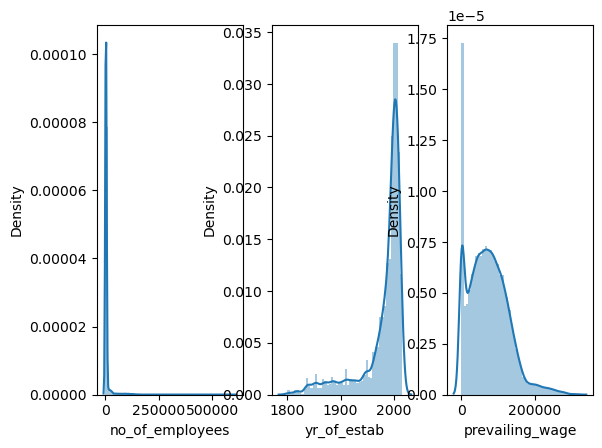

In [86]:
for i in range(len(cols)):
   # plt.figure(figsize=(5,3))
    plt.subplot(1,len(cols),i+1)
    sns.distplot(visa_df[cols[i]])